In [39]:
import numpy as np
from skimage import io, color, img_as_ubyte
from skimage.feature import greycomatrix
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


### **calculateCooccurrence(image)**
is a function that takes a 2D matrix reprsentating the image pixels in gray scale mode and return the horizantal and vertical co-occourance matrices. It works with a time complexity in O(n*m) where n*m is the image dimensions according to its documantion.

In [97]:
def calculateCooccurrence(image):
  NS = np.array([[0]*256]*256)
  WE = np.array([[0]*256]*256)
  for i in range(len(image)):
    for j in range(len(image[0])):
      pixel=image[i][j]
      if i+1<len(image):
        pixelSouth=image[i+1][j]
        NS[pixel][pixelSouth]=NS[pixel][pixelSouth]+1
      if j+1<len(image[0]):
        pixelEast=image[i][j+1]
        WE[pixel][pixelEast]=WE[pixel][pixelEast]+1
        
  return np.array([WE,NS])


### **nullifyPixels(cooccurrenceMatrices,threshold)**
This functions takes 2 argumnets ```cooccurrenceMatrices,threshold``` 
</br>
It works on setting the window of size threshold of pixels around the dignoal with 0
</br>
**Illustration example:**
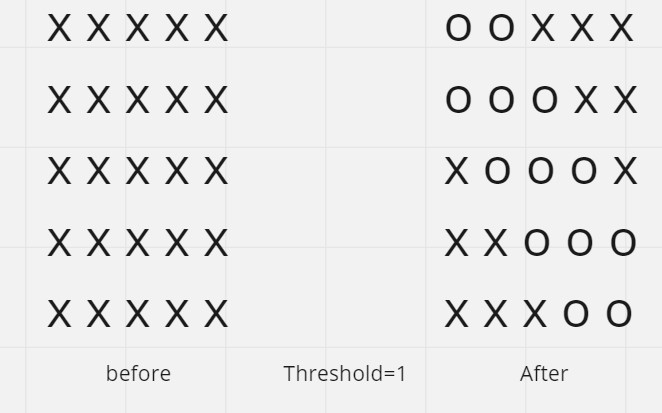

- It works with a time complexity in O(nm) where nm is the image dimensions
- It also print every co-occurance matrix before and after applying the func on it

### output
- Top Left: Vertical Co-occurrence Matrix
- Top Right: Matrix nullified
- Bottom Left: Horizontal Co-occurrence Matrix
- Bottom Right: Matrix nullified

  

In [98]:
def nullifyPixels(cooccurrenceMatrices,threshold):
  NS=cooccurrenceMatrices[1]
  WE=cooccurrenceMatrices[0]
  NS_Copy=NS.copy()
  WE_Copy=WE.copy()
  for i in range(len(NS)):
    for j in range(len(NS)):
      if abs(i-j) <= threshold:
        NS[i][j]=WE[i][j]=0  

  plt.figure()

  #subplot(r,c) provide the no. of rows and columns
  f, axarr = plt.subplots(4,2) 

  # use the created array to output your multiple images. In this case I have stacked 4 images vertically
  axarr[0][1].imshow(NS)
  axarr[0][0].imshow(NS_Copy)
  axarr[1][1].imshow(WE)
  axarr[1][0].imshow(WE_Copy)
  
  return cooccurrenceMatrices

### **```imgWithCooccurrence(imageInput,cooccurrenceMatrices):```**
This function works on reconstacting the image with a given cooccurance matrix
<br>
It takes a 2D image matrix and check every pixel and its right or down pixel if there is a relation >0 in the cooccurance matrix and set the pixel value to 255 if there is a relation, 0 otherwise
<br>
It works with a time complexity in O(nm) where nm is the image dimensions

In [106]:
def imgWithCooccurrence(imageInput,cooccurrenceMatrices):
  NS=cooccurrenceMatrices[1]
  WE=cooccurrenceMatrices[0]
  for i in range(len(imageInput)):
    for j in range(len(imageInput[i])):
      pixel=imageInput[i][j]

      if j+1 < len(imageInput[i]):
        pixelRight=imageInput[i][j+1]
        if WE[pixel][pixelRight]>0:
          imageInput[i][j]=255;
        else:
          imageInput[i][j]=0;
       
      if i+1 < len(imageInput):
        pixelDown=imageInput[i+1][j]
        if NS[pixel][pixelDown]>0:
          imageInput[i][j]=255;
        else:
          imageInput[i][j]=0;
       
  io.imshow(imageInput)
  return imageInput


### Reading the image and converting to a grayScale

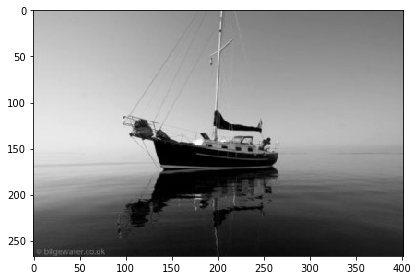

In [100]:
img = io.imread("boat2.jpg")
gray = color.rgb2gray(img)
image = img_as_ubyte(gray)
io.imshow(image)

In [101]:
result = calculateCooccurrence(image)

<Figure size 432x288 with 0 Axes>

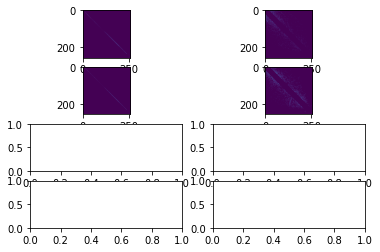

In [115]:
cooccurrenceMatrices=nullifyPixels(result.copy(),20)

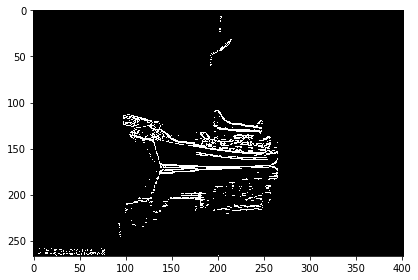

In [116]:
test=imgWithCooccurrence(image.copy(),cooccurrenceMatrices.copy())

The algorithm that we define seems works quite correctly in edge detections but we have some comments on it:


1.   It only works if the background has gradually changed colors, others will not work correctly. 
2.   The boat reflection on the water is quite noise since the algorithm doesn't differenate between that.

